In [1]:
# i.Overall funnel conversion rate (product views → order).
import pandas as pd

pv     = pd.read_csv("F:/Rokomari/page_views.csv")
orders = pd.read_csv("F:/Rokomari/orders.csv")

# Normalize column names
pv.columns = pv.columns.str.strip().str.lower()
orders.columns = orders.columns.str.strip().str.lower()


# Validate session_id
if 'session_id' not in pv.columns:
    raise KeyError("page_views.csv is missing a 'session_id' column.")
if 'session_id' not in orders.columns:
    raise KeyError("orders.csv is missing a 'session_id' column.")


# Distinct sessions that viewed any product
pv_sessions = pv['session_id'].dropna().nunique()

# Distinct sessions that placed an order
order_sessions = orders['session_id'].dropna().nunique()

# Safe division
conversion_rate = (order_sessions / pv_sessions) * 100 if pv_sessions else None

print('Overall funnel conversion_rate (product view -> order) =', conversion_rate, '%')

Overall funnel conversion_rate (product view -> order) = 21.9 %


In [2]:
# ii.	Drop-off % at each step.
import pandas as pd

pv = pd.read_csv('F:/Rokomari/page_views.csv')
add_to_cart = pd.read_csv('F:/Rokomari/add_to_cart.csv')
checkout = pd.read_csv('F:/Rokomari/checkout.csv')
orders = pd.read_csv('F:/Rokomari/orders.csv')

# Normalize column names
pv.columns = pv.columns.str.strip().str.lower()
add_to_cart.columns = add_to_cart.columns.str.strip().str.lower()
checkout.columns = checkout.columns.str.strip().str.lower()
orders.columns = orders.columns.str.strip().str.lower()


pv_sessions = pv['session_id'].dropna().nunique()
add_to_cart_sessions = add_to_cart['session_id'].dropna().nunique()
checkout_sessions = checkout['session_id'].dropna().nunique()
order_sessions = orders['session_id'].dropna().nunique()
print('product_view_sessions =', pv_sessions)
print('add_to_cart_sessions =', add_to_cart_sessions)
print('checkout_sessions =', checkout_sessions)
print('order_sessions =', order_sessions)

print('users =', pv_sessions, 'drop_off_rate = ---')

drop_off = pv_sessions - add_to_cart_sessions
drop_off_rate = (drop_off / pv_sessions) * 100 if pv_sessions else None
print('users =', add_to_cart_sessions, 'drop_off_rate =', f'{drop_off_rate:.2f}' if drop_off_rate is not None else None, '%')

drop_off = add_to_cart_sessions - checkout_sessions
drop_off_rate = (drop_off / add_to_cart_sessions) * 100 if add_to_cart_sessions else None
print('users =', checkout_sessions, 'drop_off_rate =', f'{drop_off_rate:.2f}' if drop_off_rate is not None else None, '%')

drop_off = checkout_sessions - order_sessions
drop_off_rate = (drop_off / checkout_sessions) * 100 if checkout_sessions else None
print('users =', order_sessions, 'drop_off_rate =', f'{drop_off_rate:.2f}' if drop_off_rate is not None else None, '%')

product_view_sessions = 2000
add_to_cart_sessions = 1019
checkout_sessions = 610
order_sessions = 438
users = 2000 drop_off_rate = ---
users = 1019 drop_off_rate = 49.05 %
users = 610 drop_off_rate = 40.14 %
users = 438 drop_off_rate = 28.20 %


In [3]:
# iii.	Average order value (AOV) by category.
import pandas as pd

pv = pd.read_csv('F:/Rokomari/page_views.csv')
orders = pd.read_csv('F:/Rokomari/orders.csv')

# Normalize column names
pv.columns = pv.columns.str.strip().str.lower()
orders.columns = orders.columns.str.strip().str.lower()

result = pd.merge(orders, pv, on='session_id', how='inner')
avg_order_value = result.groupby('category')['revenue'].mean().reset_index()
avg_order_value = avg_order_value.sort_values(by='revenue', ascending=False)
print(avg_order_value)

      category      revenue
1        Books  1150.327600
2  Electronics  1141.342451
3      Fashion  1093.400258
4         Food  1081.301978
0         Baby  1074.139177


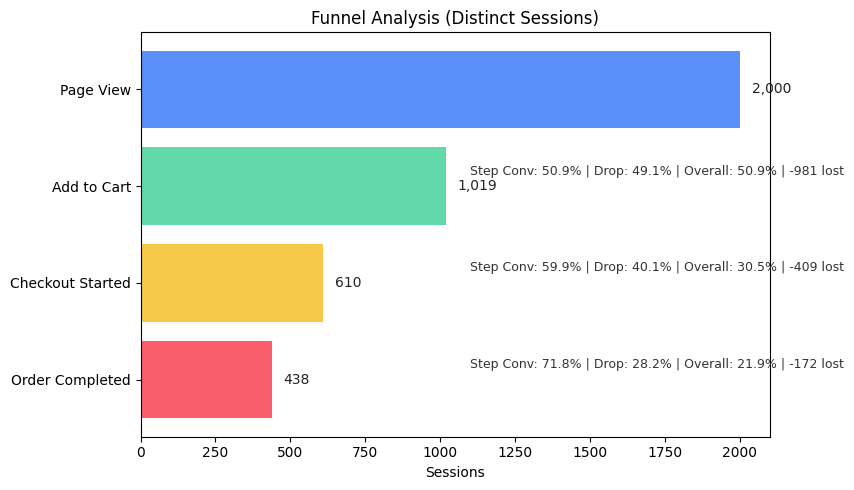

,step,sessions,step_to_step_conv,step_to_step_drop,overall_conv_from_first,cumulative_drop_from_first,absolute_drop
0,Page View,2000,NaN,NaN,1.0000,0.0000,NaN
1,Add to Cart,1019,0.509500,0.490500,0.5095,0.4905,981.0
2,Checkout Started,610,0.598626,0.401374,0.3050,0.6950,409.0
3,Order Completed,438,0.718033,0.281967,0.2190,0.7810,172.0


In [4]:
# Funnel analysis chart 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


steps  = ["Page View", "Add to Cart", "Checkout Started", "Order Completed"]
counts = [2000, 1019, 610, 438]

funnel_df = pd.DataFrame({"step": steps, "sessions": counts})

sessions = funnel_df["sessions"].values
n = len(sessions)

# Step-to-step conversion and drop
step_conv = [np.nan]  # conv[i] = sessions[i] / sessions[i-1]
step_drop = [np.nan]
for i in range(1, n):
    prev = sessions[i-1]
    c = np.nan if prev == 0 else sessions[i] / prev
    step_conv.append(c)
    step_drop.append(1 - c if c is not np.nan else np.nan)

# Overall conversion from first step and cumulative drop
overall_conv = [1.0] + [ (np.nan if sessions[0] == 0 else sessions[i] / sessions[0]) for i in range(1, n) ]
cum_drop = [ 1 - c if not np.isnan(c) else np.nan for c in overall_conv ]

# Absolute drop per step
abs_drop = [np.nan] + [ sessions[i-1] - sessions[i] for i in range(1, n) ]

funnel_df["step_to_step_conv"] = step_conv
funnel_df["step_to_step_drop"] = step_drop
funnel_df["overall_conv_from_first"] = overall_conv
funnel_df["cumulative_drop_from_first"] = cum_drop
funnel_df["absolute_drop"] = abs_drop


fig, ax = plt.subplots(figsize=(8.5, 5))
colors = ["#5b8ff9", "#61d9a8", "#f7c948", "#f95d6a"]
if len(colors) < n:
    colors = (colors * ((n // len(colors)) + 1))[:n]

bars = ax.barh(funnel_df["step"], funnel_df["sessions"], color=colors)
ax.invert_yaxis()
ax.set_title("Funnel Analysis (Distinct Sessions)", fontsize=12)
ax.set_xlabel("Sessions")

# annotate counts on bar ends
xmax = max(funnel_df["sessions"]) if len(funnel_df) else 0
for i, (bar, cnt) in enumerate(zip(bars, funnel_df["sessions"])):
    ax.text(cnt + xmax * 0.02, bar.get_y() + bar.get_height()/2,
            f"{cnt:,}", va="center", fontsize=10, color="#222")

# annotate step conversions & drops next to each bar (except the first)
for i in range(1, n):
    sc = funnel_df.loc[i, "step_to_step_conv"]
    sd = funnel_df.loc[i, "step_to_step_drop"]
    ad = funnel_df.loc[i, "absolute_drop"]
    oc = funnel_df.loc[i, "overall_conv_from_first"]
    label = []
    if not np.isnan(sc):
        label.append(f"Step Conv: {sc*100:.1f}%")
        label.append(f"Drop: {sd*100:.1f}%")
    if not np.isnan(oc):
        label.append(f"Overall: {oc*100:.1f}%")
    label.append(f"-{int(ad):,} lost")


    label_x = max(xmax * 0.55, sessions[i-1] * 0.55)
    ax.text(label_x, i - 0.12, " | ".join(label), fontsize=9, color="#333")

# tidy
plt.tight_layout()
plt.savefig("funnel_chart.png", dpi=160)
plt.show()

funnel_df